In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
spectrum = np.loadtxt("data_msp1000/A620EBA HgCal.mspec", delimiter=',')[:,1]

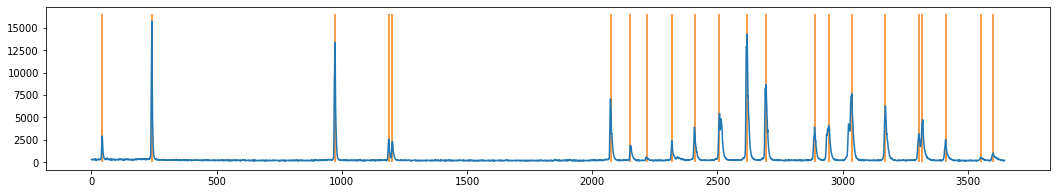

In [3]:
peaks, _ = find_peaks(spectrum, prominence=300, distance=15, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=3)

plt.figure(figsize=(18,3))
plt.plot(spectrum)
plt.vlines(peaks_refined,
              0,
              1.05*spectrum.max(),
              colors='C1')

In [4]:
c = Calibrator(peaks_refined, 
               num_pix=len(spectrum),
               min_wavelength=4000.,
               max_wavelength=8750.)

c.add_atlas("Hg")
c.add_atlas("Ar", min_wavelength=6500) # Ignore bluer Argon lines

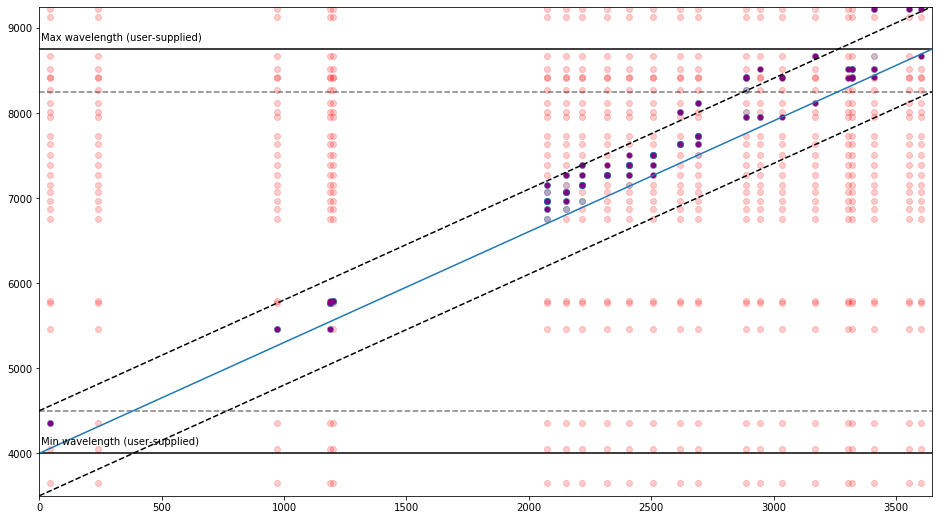

In [5]:
c.plot_search_space()


Peak at: 4045.8375863617566 A
- matched to 4046.56 A
Peak at: 4357.245219206681 A
- matched to 4358.33 A
Peak at: 5460.678089371839 A
- matched to 5460.74 A
Peak at: 5769.786172026663 A
- matched to 5769.6 A
Peak at: 5790.581481309717 A
- matched to 5790.66 A
Peak at: 6965.408232037988 A
- matched to 6965.43 A
Peak at: 7066.416549871829 A
- matched to 7067.218 A
Peak at: 7147.639257123596 A
- matched to 7147.04 A
Peak at: 7273.268420821818 A
- matched to 7272.94 A
Peak at: 7383.715902016391 A
- matched to 7383.98 A
Peak at: 7504.322623379843 A
- matched to 7503.87 A
Peak at: 7635.279248967729 A
- matched to 7635.11 A
Peak at: 7722.80804488889 A
- matched to 7723.76 A
Peak at: 7948.945892664811 A
- matched to 7948.18 A
Peak at: 8013.292539672279 A
Peak at: 8115.202096667679 A
- matched to 8115.31 A
Peak at: 8264.257853247147 A
- matched to 8264.52 A
Peak at: 8408.42578376644 A
- matched to 8408.2 A
Peak at: 8424.043891201864 A
- matched to 8424.65 A
Peak at: 8521.97376667902 A
- matche

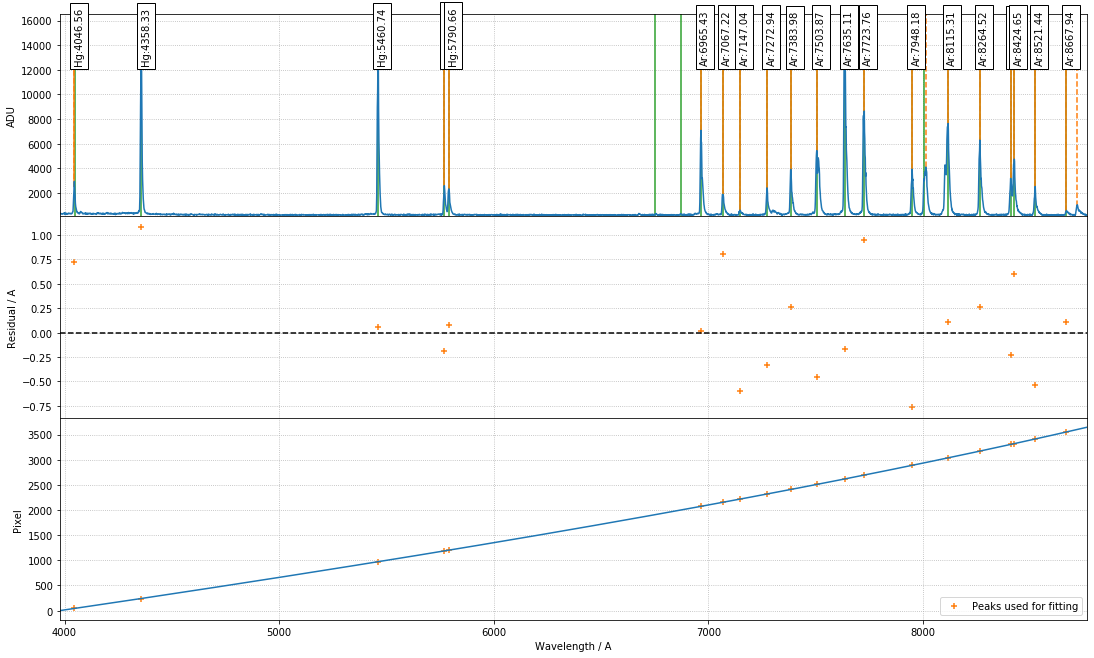

Stdev error: 0.45614331788375867 A
Peaks utilisation rate: 81.81818181818183%


In [6]:
final_tolerance =5.

best_p, rms, residual, peak_utilisation = c.fit(max_tries=3000)
best_p, x_fit, y_fit, residual, peak_utilisation = c.match_peaks_to_atlas(best_p, tolerance=final_tolerance)

c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False, tolerance=final_tolerance)

fit_diff = c.polyval(x_fit, best_p) - y_fit

rms = np.sqrt(np.sum(fit_diff**2 / len(x_fit)))

print("Stdev error: {} A".format(fit_diff.std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))

NB: The peak at 8718.34 is almost certainly the N=1 image of 4358 (Hg)